<a href="https://colab.research.google.com/github/tarikCiftci/Machine_learning_projects/blob/main/Copie_de_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading data

Dowload a face dataset from [this link](https://drive.google.com/file/d/1oT9MECiNsJbQB5v4Zzc0GbdQy4F_aZzh/view?usp=sharing). Unzip it and upload it to your own Drive

It is consists of 7 persons, each has 10 training images and testing images of his face

It is recommended to add your own images, taken from different point of view, in order to test our model in a real camera test

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/face_database

/content/drive/MyDrive/face_database


In [ ]:
path=  '/content/drive/MyDrive/face_database'    #'/content/face_database'#

In [ ]:
import os
import glob

### Get Image names stored in "Images" folder

In [ ]:
# Get Image names stored in "Images" folder
image_path_names=[]
person_names=set()
for file_name in glob.glob(path+'/Images/*_[0-9]*.jpg'):
  image_path_names.append(file_name)
  person_names.add(image_path_names[-1].split('/')[-1].split('_')[0])

Print the number of total images and the name of persons

In [ ]:
print(len(image_path_names))

64


Print the name of persons



In [ ]:
print(person_names)

{'Tarik', 'Macron', 'Merkel', 'Jolie', 'Jackman', 'Hawking', 'Washington'}


  There are total 70 images containing 10 images per person.

## Dlib Modules:

Face detection is a priori step for face recognition. 
In order to activate the detection function, we will need to download alread-trained model for a detection task . In other words, the downloaded file is the trained detection model

In [ ]:
# Download Dlib CNN face detector
! wget http://dlib.net/files/mmod_human_face_detector.dat.bz2

!bzip2 -dk mmod_human_face_detector.dat.bz2

--2022-05-22 13:53:01--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.43K   755KB/s    in 0.9s    

2022-05-22 13:53:02 (755 KB/s) - ‘mmod_human_face_detector.dat.bz2’ saved [694709/694709]

bzip2: Output file mmod_human_face_detector.dat already exists.


In [ ]:
%rm mmod_human_face_detector.dat.bz2

In [ ]:
import cv2
import matplotlib.pyplot as plt
import dlib

In [ ]:
# Load CNN face detector into dlib
dnnFaceDetector=dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

##Face Images Preparation

We suggest to put all raw images in a separated directory, "Images", where each image is named by the actor's/person's name, as this pattern 

*Cedric_01.jpg, Cedric_02.jpg.....etc*

*Eric_01.jpg, Eric_02 ...etc*

Then, the Dlib-based detector will scan each image, to detect faces and crop it into a new image
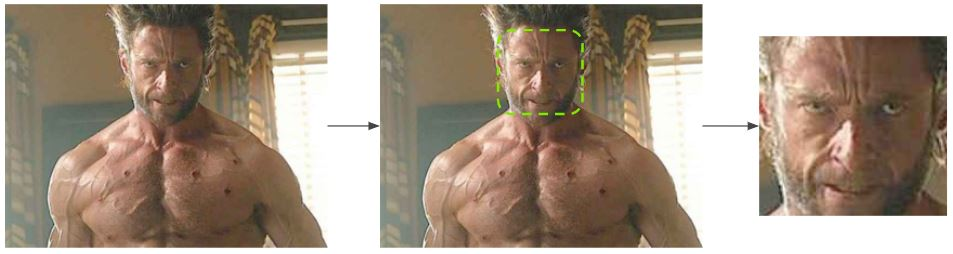

So, it pus each cropped image within a specific directory, named as the person's name


In [ ]:
os.mkdir(path+'/Images_crop/')

In [ ]:
# For each person create a separate folder
for person in person_names:
  os.mkdir(path+'/Images_crop/'+person+'/')

### Face Detection and Crop

In [ ]:
# Detect face, crop detected face and save them in corresponding person folder
for file_name in image_path_names:
  print(file_name)
  img=cv2.imread(file_name)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
  width=right-left
  height=bottom-top
  img_crop=img[top:top+height,left:left+width]
  img_path=path+'/Images_crop/'+file_name.split('/')[-1].split('_')[0]+'/'+file_name.split('/')[-1]
  cv2.imwrite(img_path,img_crop)

In [ ]:
# Get Image names for testing
test_image_path_names=[]
for file_name in glob.glob(path+'/Images_test/*_[123]*.jpg'):   
  test_image_path_names.append(file_name)



In [ ]:
len(test_image_path_names)

20

For each person 3 images to test in Images_test folder.

In [ ]:
os.mkdir(path+'/Test_Images_crop/')

In [ ]:
# Create Separate folder for each person in "Test_Images_crop" folder
for person in person_names:
  os.mkdir(path+'/Test_Images_crop/'+person+'/')

In [ ]:
# Detect face,crop face and save in corresponding folder
for file_name in test_image_path_names:
  print(file_name)
  img=cv2.imread(file_name)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
  width=right-left
  height=bottom-top
  img_crop=img[top:top+height,left:left+width]
  img_path=path+'/Test_Images_crop/'+file_name.split('/')[-1].split('_')[0]+'/'+file_name.split('/')[-1]
  cv2.imwrite(img_path,img_crop)

<pre>Here images are sorted to corresponding test and train folders of same person
Directory structure :
|Images /
|  |-- (78 images)
|Images_crop /
|  |--Hawking / (10 images)
|  |--Jackman / (10 images)
|  |--Jolie / (10 imgaes)
|  |--Macron / (10 images)
|  |--Merkel / (10 images) 
|  |--Yasser / (10 images)
|Images_test / 
|  |-- .. / (18 images)
|Images_test_crop / 
|  |--Hawking / (3 images)
|  |--Jackman / (3 images)
|  |--Jolie / (3 imgaes)
|  |--Merkel / (3 images)
|  |--Yasser / (3 images) 
|Face_Recognition.ipynb
|mmod_human_face_detector.dat
</pre>

## Model Architecture 
We will choose VGG16 architecture as a base model for our face recognition system. Then, will load the weights oe pre-trained model, since it's long to retrain it, and the knwoled that it has is very good to get features representation (embedding)

Then, we will modify the head of this model to, fine tune it, 
- adding a new model to classify features into classes (

In [ ]:
!pip install gdown

In [ ]:
#Download pre-trained vgg-face-model-weights as .h5 file
! gdown https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo

Downloading...
From: https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo
To: /content/drive/MyDrive/face_database/vgg_face_weights.h5
100% 580M/580M [00:03<00:00, 178MB/s]


In [ ]:
%ls

face_classifier_model.h5  mmod_human_face_detector.dat  vgg_face_model.h5
Images/                   Predictions/                  vgg_face_weights.h5
Images_crop/              test_examples/
Images_test/              Test_Images_crop/


In [ ]:
! pip install tensorflow==2.0.0

In [ ]:
!pip install 'h5py==2.10.0' --force-reinstall

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K

In [ ]:
tf.__version__

'2.0.0'

### VGG_FACE_MODEL architecture

You have already studied this model. Try to define its layers (look back at lecture slides)

In [ ]:
#Define VGG_FACE_MODEL architecture
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [ ]:
# Load VGG Face model weights
model.load_weights('vgg_face_weights.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [ ]:
# Remove Last Softmax layer and get model upto last flatten layer with outputs 2622 units
vgg_face=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

In [ ]:
tf.keras.models.save_model(vgg_face,path + '/vgg_face_model.h5',include_optimizer=False)

In [ ]:
vgg_face.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_input (InputL [(None, 224, 224, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0     

## Data Preparation
- training dataset
- testing dataset

Now, since we provide images to the base model, it will create for each image an embedding (unified features representation). There for its output will be an input to a new model (classifier) to classify them into corresponding persons. 


In [ ]:
#Prepare Training Data
x_train=[]
y_train=[]
person_folders=os.listdir(path+'/Images_crop/')
person_rep=dict()
for i,person in enumerate(person_folders):
  person_rep[i]=person
  image_names=os.listdir(path+'/Images_crop/'+person+'/')
  for image_name in image_names:
    if image_name != '.ipynb_checkpoints':
      img=load_img(path+'/Images_crop/'+person+'/'+image_name,target_size=(224,224))
      img=img_to_array(img)
      img=np.expand_dims(img,axis=0)
      img=preprocess_input(img)
      img_encode=vgg_face(img)  ## using the vgg_face model is to create feature representation for each images
      x_train.append(np.squeeze(K.eval(img_encode)).tolist())
      y_train.append(i)


In [ ]:
person_rep

{0: 'Merkel',
 1: 'Hawking',
 2: 'Tarik',
 3: 'Washington',
 4: 'Macron',
 5: 'Jackman',
 6: 'Jolie'}

In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)

x_train.shape

(64, 2622)

In [ ]:
#Prepare Test Data
x_test=[]
y_test=[]
person_folders=os.listdir(path+'/Test_Images_crop/')
for i,person in enumerate(person_folders):
  image_names=os.listdir(path+'/Test_Images_crop/'+person+'/')
  for image_name in image_names:
    img=load_img(path+'/Test_Images_crop/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_test.append(np.squeeze(K.eval(img_encode)).tolist())
    y_test.append(i)

In [ ]:
x_test=np.array(x_test)
y_test=np.array(y_test)

x_test.shape

(20, 2622)

In [ ]:
# Save test and train data for later use
np.save(path+'/train_data',x_train)
np.save(path+'/train_labels',y_train)
np.save(path+'/test_data',x_test)
np.save(path+'/test_labels',y_test)

In [ ]:
# Load saved data
x_train=np.load(path+'/train_data.npy')
y_train=np.load(path+'/train_labels.npy')
x_test=np.load(path+'/test_data.npy')
y_test=np.load(path+'/test_labels.npy')


### Classification of Embeddings

In [ ]:
#  classify faces based on encoding 
classifier_model=Sequential()
classifier_model.add(Dense(units=100,input_dim=x_train.shape[1],kernel_initializer='glorot_uniform'))

classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.3))
classifier_model.add(Dense(units=10,kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.2))
classifier_model.add(Dense(units=7,kernel_initializer='he_uniform'))
classifier_model.add(Activation('softmax'))
classifier_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='nadam',metrics=['accuracy'])

In [ ]:
classifier_model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Train on 64 samples, validate on 20 samples
Epoch 1/100
64/64 [==============================] - 2s 33ms/sample - loss: 1.9288 - accuracy: 0.1875 - val_loss: 1.0860 - val_accuracy: 0.6500
Epoch 2/100
64/64 [==============================] - 0s 551us/sample - loss: 0.7971 - accuracy: 0.8438 - val_loss: 0.7973 - val_accuracy: 0.7500
Epoch 3/100
64/64 [==============================] - 0s 536us/sample - loss: 0.7269 - accuracy: 0.9062 - val_loss: 0.7485 - val_accuracy: 0.7500
Epoch 4/100
64/64 [==============================] - 0s 483us/sample - loss: 0.6925 - accuracy: 0.8750 - val_loss: 0.5845 - val_accuracy: 0.9000
Epoch 5/100
64/64 [==============================] - 0s 505us/sample - loss: 0.6016 - accuracy: 0.8750 - val_loss: 0.5926 - val_accuracy: 0.9500
Epoch 6/100
64/64 [==============================] - 0s 512us/sample - loss: 0.5530 - accuracy: 0.9219 - val_loss: 0.5751 - val_accuracy: 0.9500
Epoch 7/100
64/64 [==============================] - 0s 549us/sample - loss: 0.5807 - a

In [ ]:
classifier_model.evaluate(x_test,y_test)

20/1 [========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 202us/sample - loss: 0.1546 - accuracy: 1.0000


[0.1545758694410324, 1.0]

In [ ]:
# Save model for later use
tf.keras.models.save_model(classifier_model,path + '/face_classifier_model.h5',include_optimizer=False)

In [ ]:
# Load saved model
classifier_model=tf.keras.models.load_model(path + '/face_classifier_model.h5')

In [ ]:
# Path to folder which contains images to be tested and predicted
test_images_path=path+'/Test_Images/'

In [ ]:
dnnFaceDetector=dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

In [ ]:
def plot(img):
  plt.figure(figsize=(8,4))
  plt.imshow(img[:,:,::-1])
  plt.show()

In [ ]:
# Label names for class numbers
#person_rep={0:'Stephen Hawking',1:'Angelina Jolie',2:'Yasser Almehio',3:'Hough Jackman',4:'Denzel Washington',5:'Angela Merkel', 6:'Emanuel Macron'}

In [ ]:
person_rep

{0: 'Merkel',
 1: 'Hawking',
 2: 'Tarik',
 3: 'Washington',
 4: 'Macron',
 5: 'Jackman',
 6: 'Jolie'}

In [ ]:
os.mkdir(path+'/Predictions')

In [ ]:
for img_name in os.listdir(path+'/test_examples/'):
  if img_name=='crop_img.jpg':
    continue
  # Load Image
  img=cv2.imread(path+'/test_examples/'+img_name)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # Detect Faces
  rects=dnnFaceDetector(gray,1)
  left,top,right,bottom=0,0,0,0
  for (i,rect) in enumerate(rects):
    # Extract Each Face
    left=rect.rect.left() #x1
    top=rect.rect.top() #y1
    right=rect.rect.right() #x2
    bottom=rect.rect.bottom() #y2
    width=right-left
    height=bottom-top
    img_crop=img[top:top+height,left:left+width]
    cv2.imwrite(path+'/test_examples/crop_img.jpg',img_crop)
    
    # Get Embeddings
    crop_img=load_img(path+'/test_examples/crop_img.jpg',target_size=(224,224))
    crop_img=img_to_array(crop_img)
    crop_img=np.expand_dims(crop_img,axis=0)
    crop_img=preprocess_input(crop_img)
    img_encode=vgg_face(crop_img)

    # Make Predictions
    embed=K.eval(img_encode)
    person=classifier_model.predict(embed)
    name=person_rep[np.argmax(person)]
    os.remove(path+'/test_examples/crop_img.jpg')
    cv2.rectangle(img,(left,top),(right,bottom),(0,255,0), 2)
    img=cv2.putText(img,name,(left,top-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,255),4,cv2.LINE_AA)
    img=cv2.putText(img,str(np.max(person)),(right,bottom+10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,255),2,cv2.LINE_AA)
  # Save images with bounding box,name and accuracy 
  cv2.imwrite(path+'/Predictions/'+img_name,img)
  plot(img)

### Let's integrate your model on PC-based system (CPU/GPU, Camera, script) 

